# Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from scipy.stats import t

# Importing the dataset

In [5]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

# Description of the dataset

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO).It contains 3998 observations for 38 different variables. These variables include employment outcomes like salary,designation and city of the job,different test scores like Class X score, Class X11 score, AMCAT scores etc. and other data like his gender, the college he studied in etc.

# Objective

We aim to establish a correlation between different variables. For example, the salary distribution among females as compared to males.

In [6]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
df.shape

(3998, 39)

In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [9]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [10]:
df.describe(include = 'object')

,Unnamed: 0,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,1,67,419,339,2,275,340,4,46,26
top,train,present,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,3998,1875,539,627,3041,1395,1400,3700,880,915


In [11]:
df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [12]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

There are no missing values.

# Step- 2 Univariate Analysis

We find different measures of central tendency and spread using boxplots,histograms and countplots. Here, we take only numerical columns and exclude those columns whose distributions have no significance

In [13]:
num_data = df.describe()
print(num_data.columns)

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [14]:
num_data = num_data.drop(['ID','CollegeID','CollegeCityID'], axis = 1)

In [15]:
cols = num_data.columns
print(cols)

Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


# Boxplot

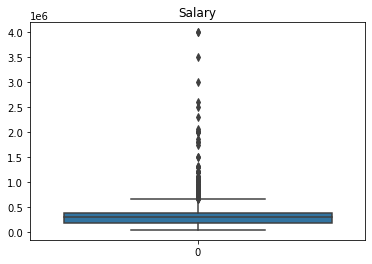

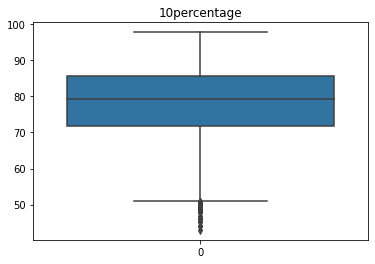

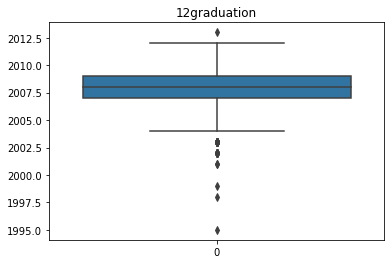

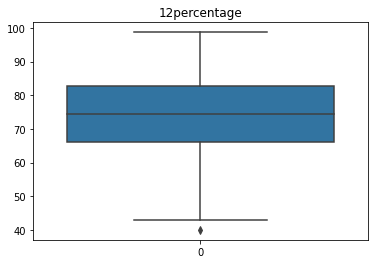

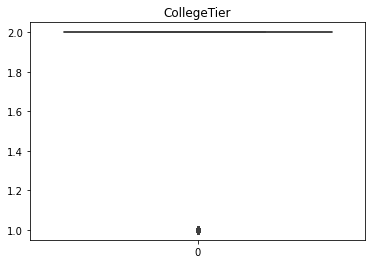

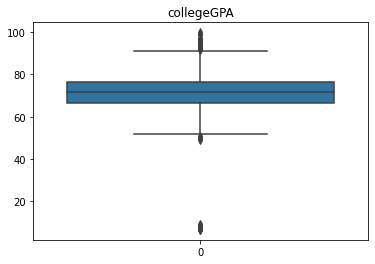

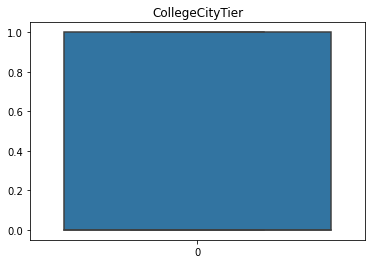

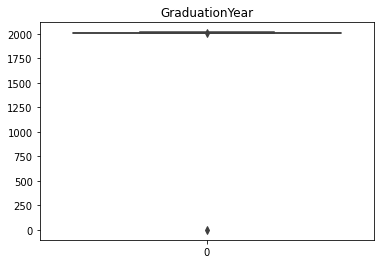

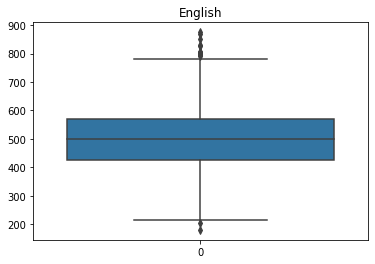

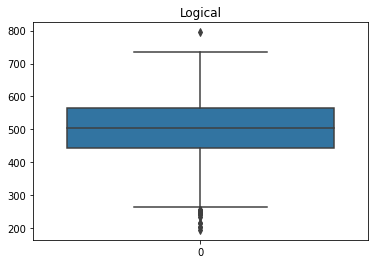

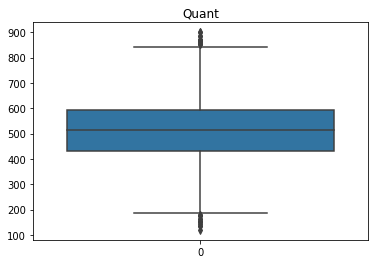

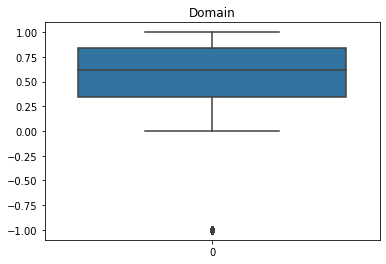

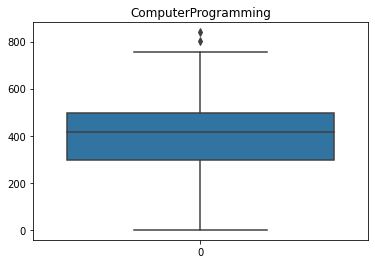

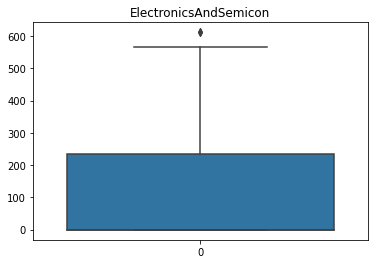

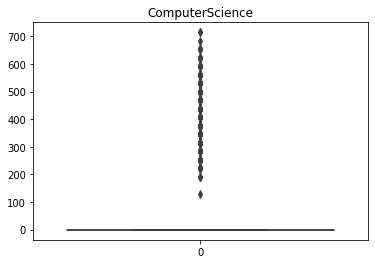

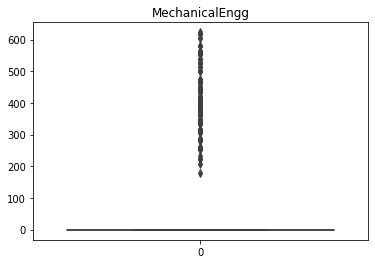

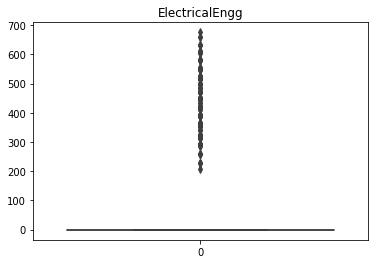

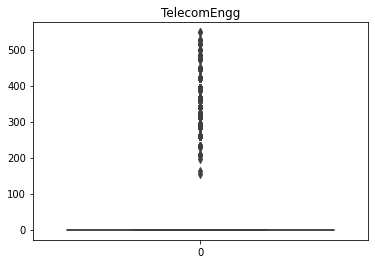

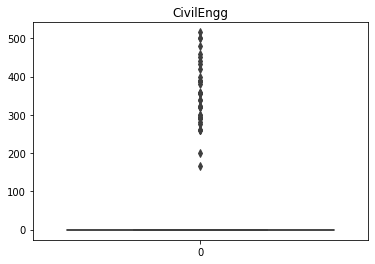

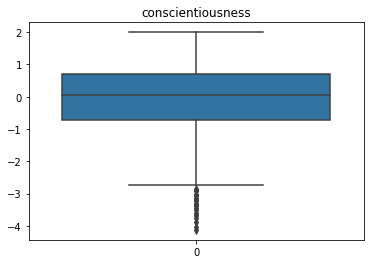

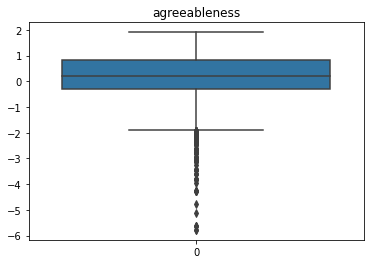

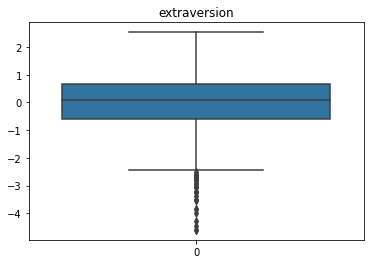

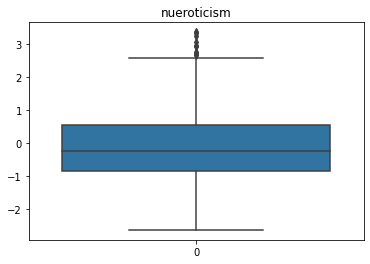

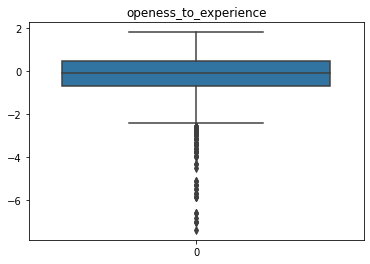

In [16]:
for i in cols:
    sns.boxplot(data = df[i])
    plt.title(i)
    plt.show()

The boxplots plotted above show the outliers for each numerical column. If the data point is less than Q1 - 1.5 * IQR or is greater than Q3 + 1.5 * IQR, it is treated as an outlier. Here Q1 is the first quantile, Q3 is the third quantile and IQR is the Inter Quartile Range. However, it makes sense to remove outliers by the above mentioned method for 'Salary','10percentage','12percentage','collegeGPA','English','Logical','Quant' columns.

## Cloning our dataframe

We will drop outliers in the cloned data and compare it with original data

In [17]:
cloned_data = df.copy()

In [18]:
l = ['Salary','10percentage','12percentage','collegeGPA','English','Logical','Quant']
d = set([])
for i in l:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper = df[i] >= (Q3+1.5*IQR)
    lower = df[i] <= (Q1-1.5*IQR)
    a = set(np.where(upper)[0])
    b = set(np.where(lower)[0])
    c = a.union(b)
    d = d.union(c)

In [19]:
print(len(d))

233


We have 233 outliers in total.

In [20]:
for i in d:
    cloned_data.drop(i,inplace = True)

In [21]:
cloned_data.shape

(3765, 39)

In [22]:
cloned_data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.765000e+03,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,...,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000
mean,6.748363e+05,285558.831341,78.080887,2008.142098,74.496444,5224.741567,1.933333,71.586988,5224.741567,0.299336,...,93.130412,21.678884,16.976361,31.808765,2.101726,-0.026843,0.148665,0.005025,-0.167477,-0.134668
std,3.605870e+05,125634.183190,9.484074,1.610686,10.908551,4821.898704,0.249477,7.139949,4821.898704,0.458028,...,177.009796,95.460405,88.716759,104.607711,33.236705,1.027976,0.939689,0.954114,1.009877,1.006925
min,1.124400e+04,35000.000000,51.000000,1995.000000,43.000000,2.000000,1.000000,51.800000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.382480e+05,180000.000000,72.000000,2007.000000,66.150000,519.000000,2.000000,66.600000,519.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.589900,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.463540e+05,300000.000000,79.060000,2008.000000,74.400000,3944.000000,2.000000,71.720000,3944.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,1.001099e+06,360000.000000,85.600000,2009.000000,82.560000,8820.000000,2.000000,76.230000,8820.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,650000.000000,97.120000,2013.000000,98.700000,18409.000000,2.000000,91.200000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.315400,3.352500,1.822400


The dataframe cloned_data contains a dataset cleared of salary outliers. We perform similar process for other numerical columns. 

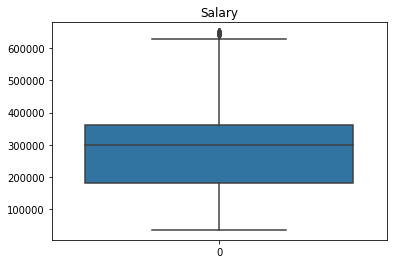

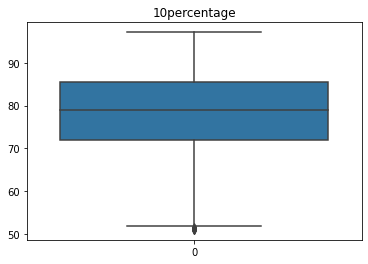

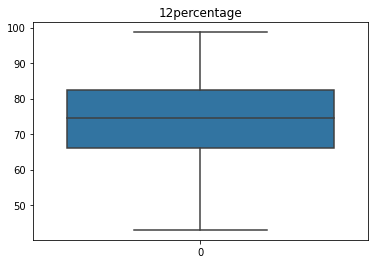

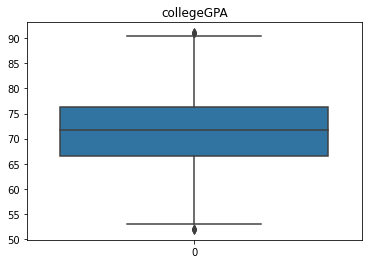

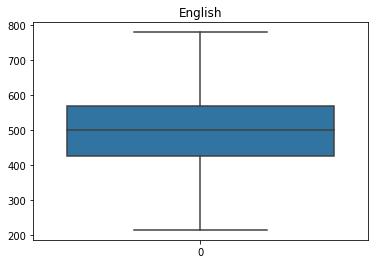

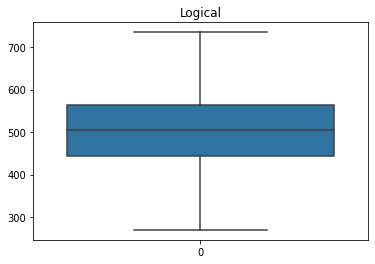

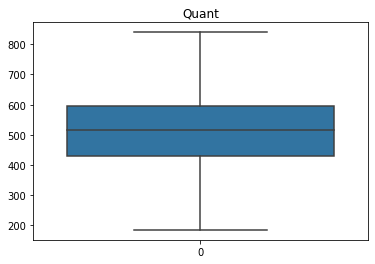

In [23]:
for i in l:
    sns.boxplot(data = cloned_data[i])
    plt.title(i)
    plt.show()

We have successfully plotted boxplots without outliers.

## Histograms

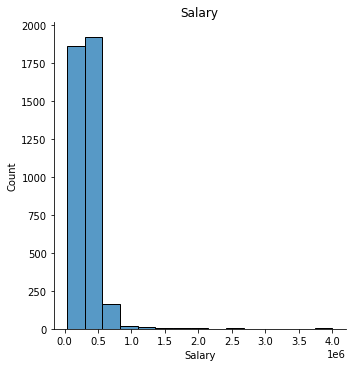

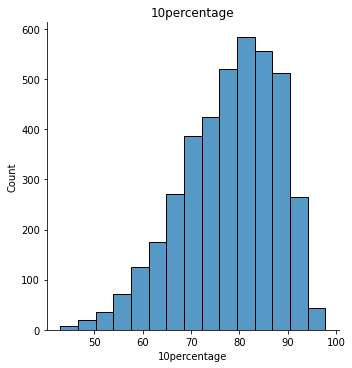

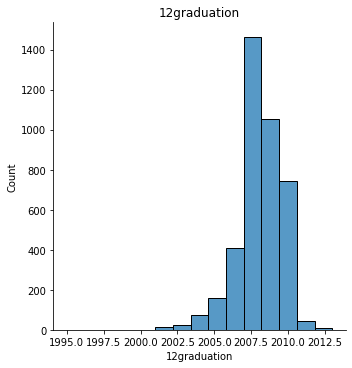

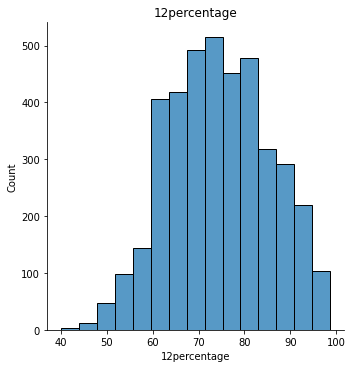

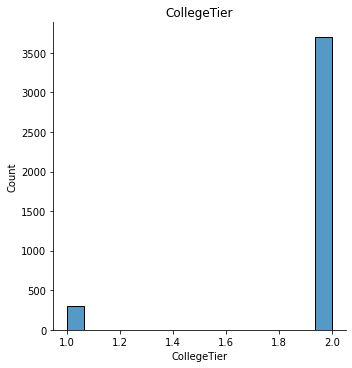

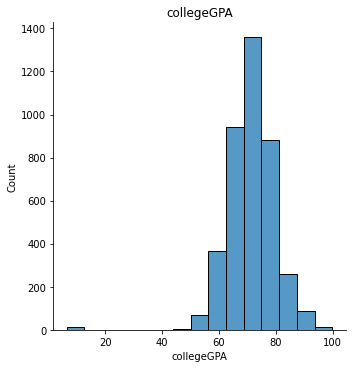

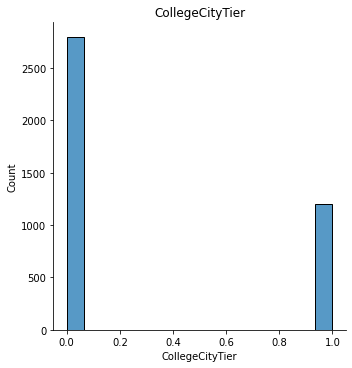

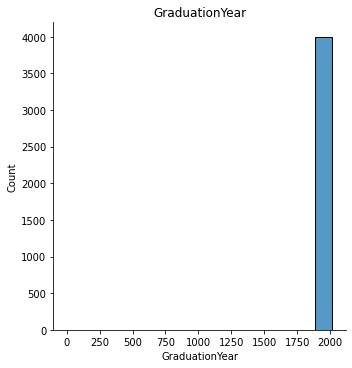

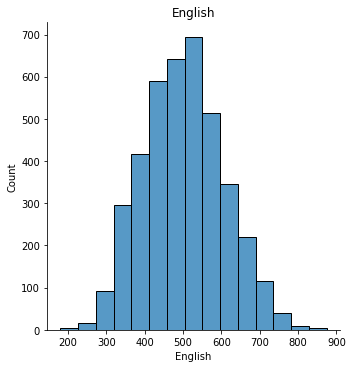

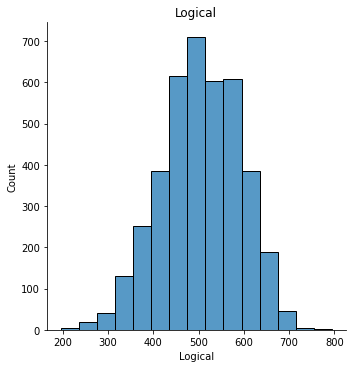

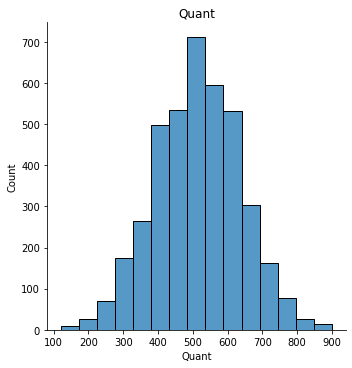

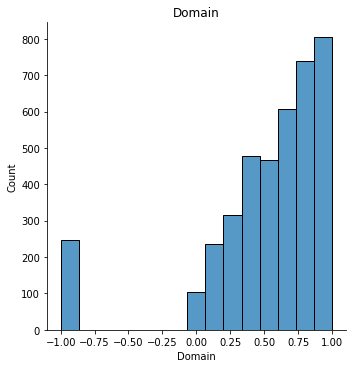

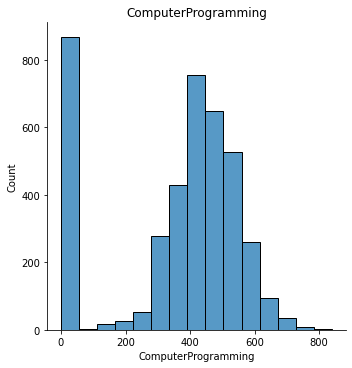

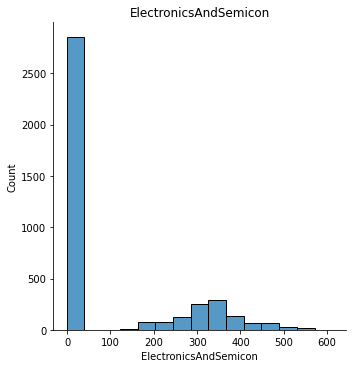

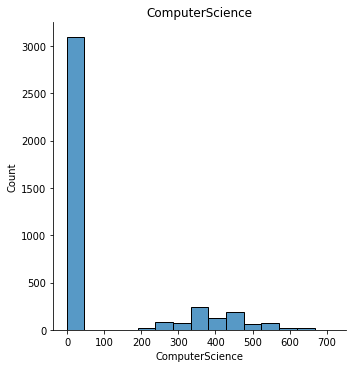

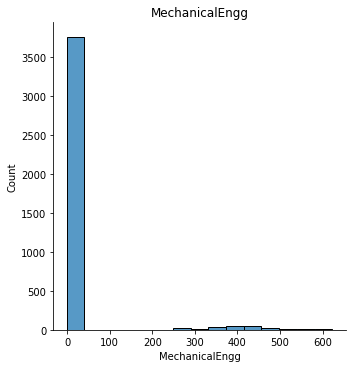

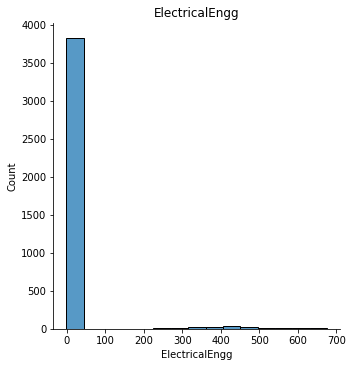

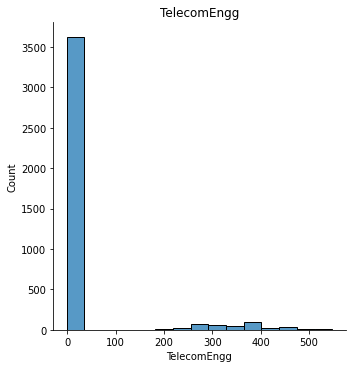

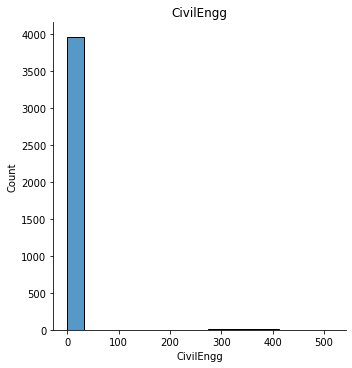

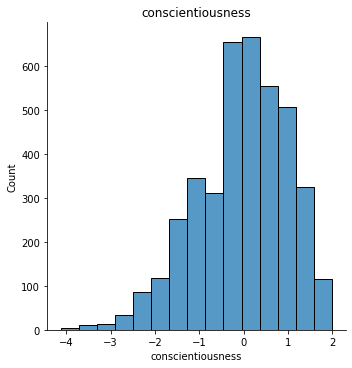

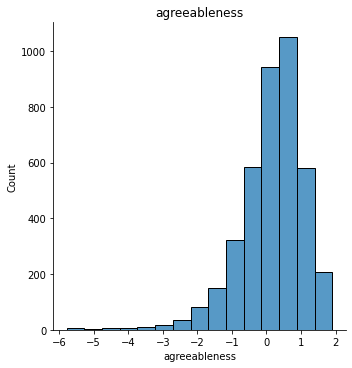

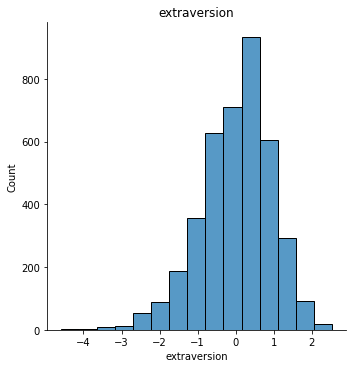

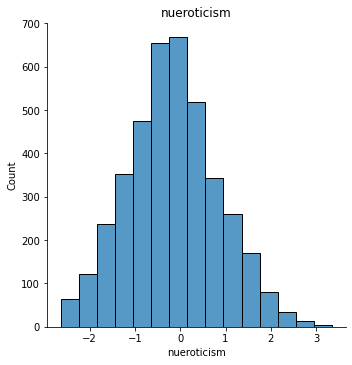

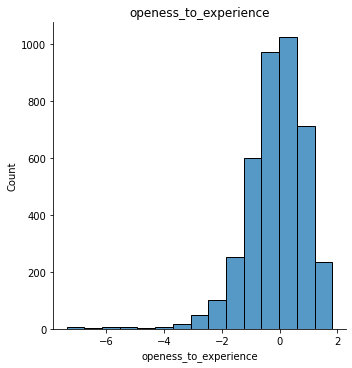

In [24]:
for i in cols:
    sns.displot(data = df[i],bins = 15)
    plt.title(i)
    plt.show()

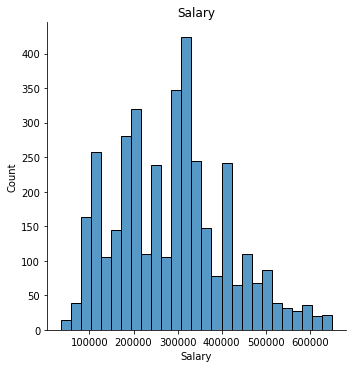

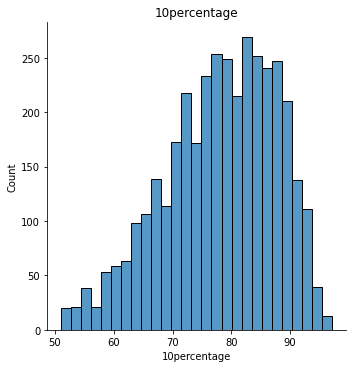

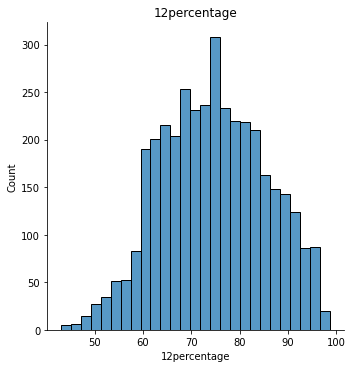

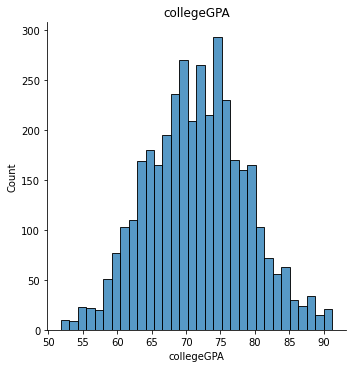

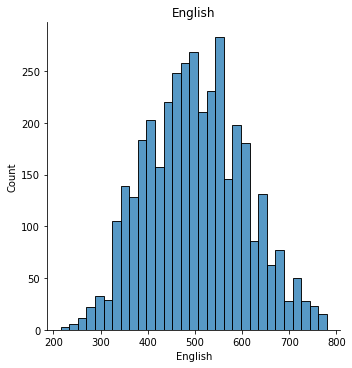

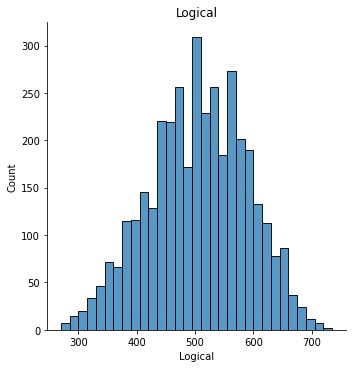

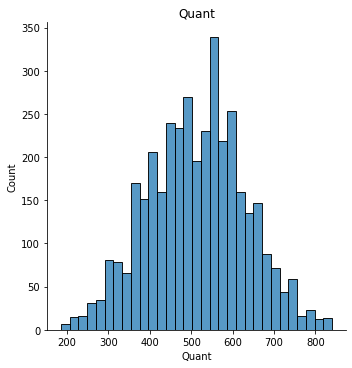

In [25]:
for i in l:
    sns.displot(data = cloned_data[i])
    plt.title(i)
    plt.show()

## KDE Plots

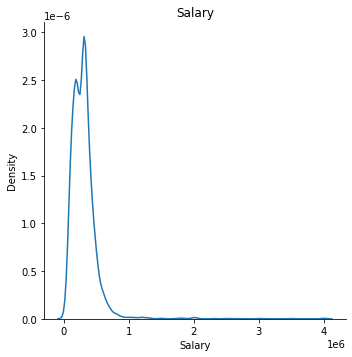

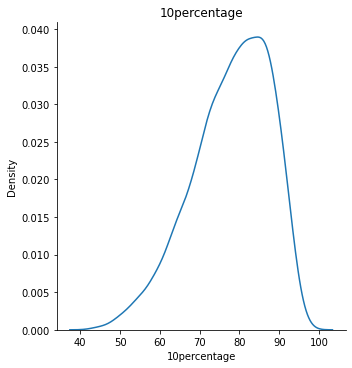

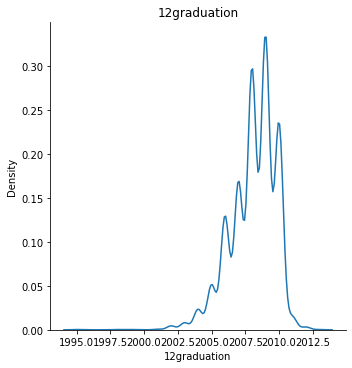

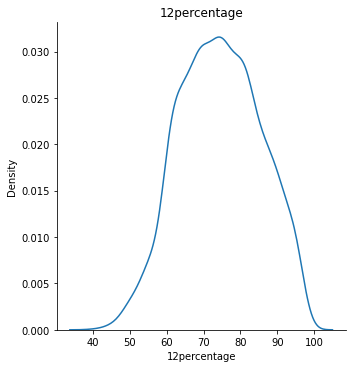

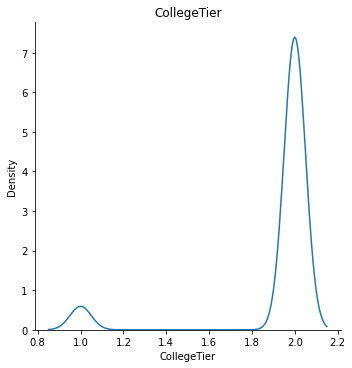

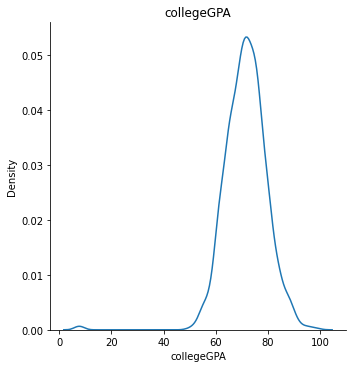

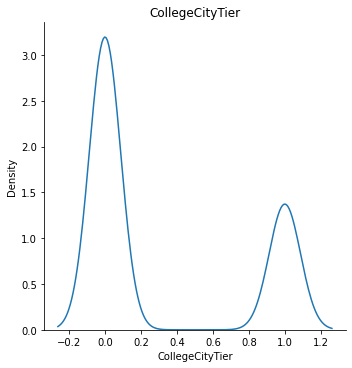

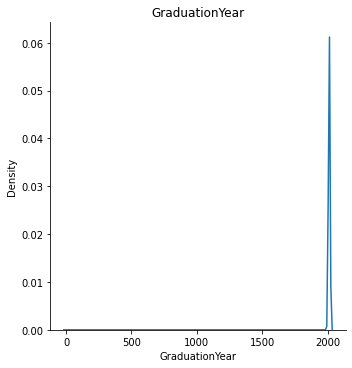

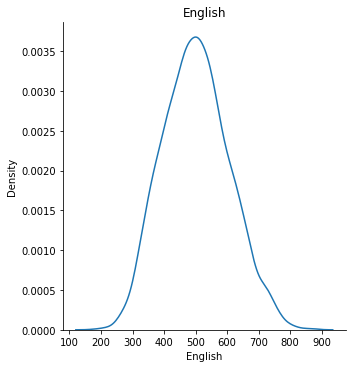

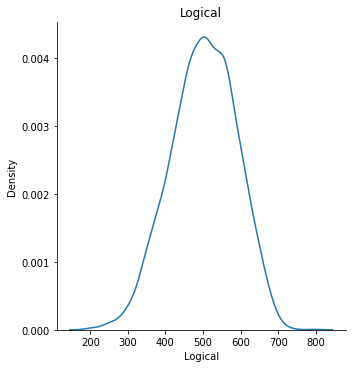

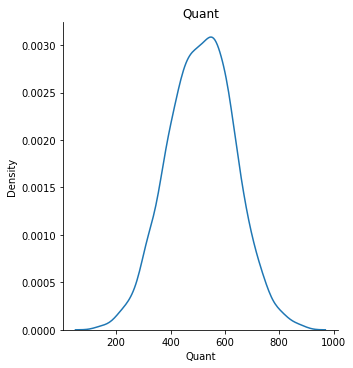

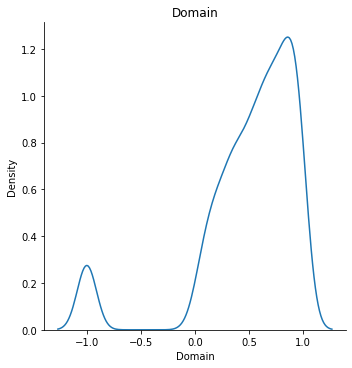

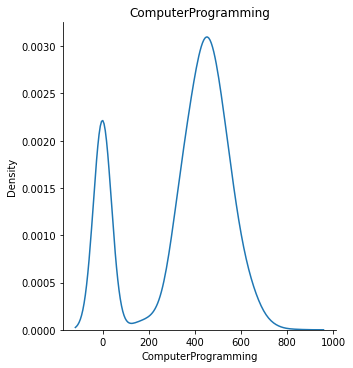

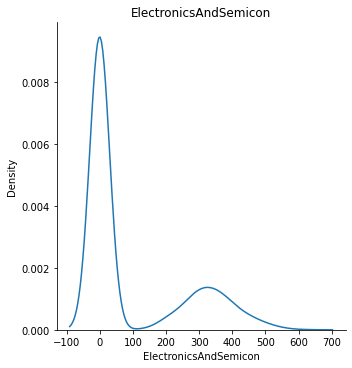

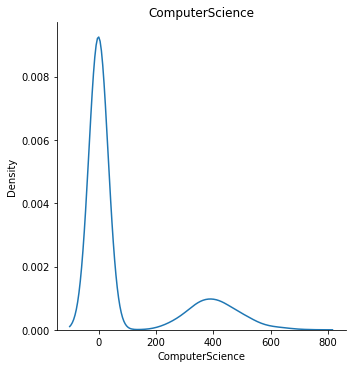

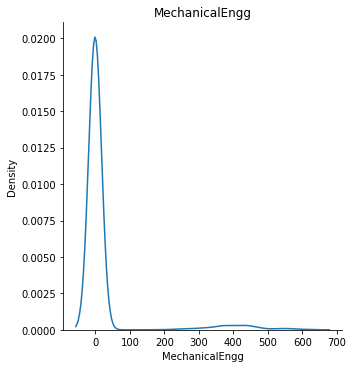

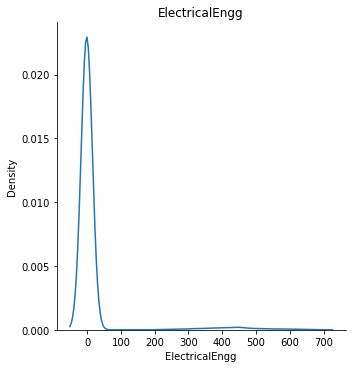

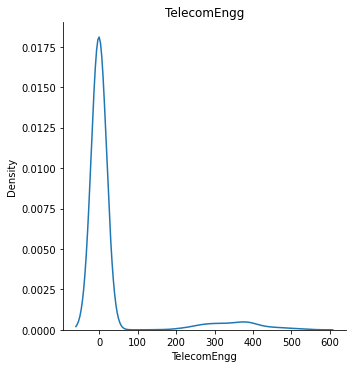

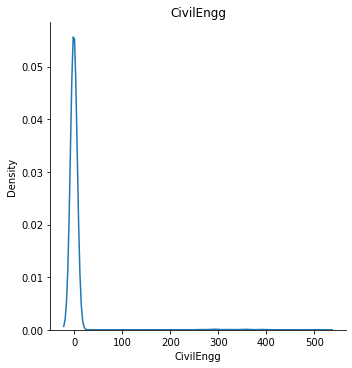

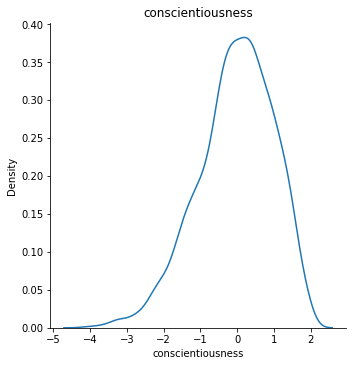

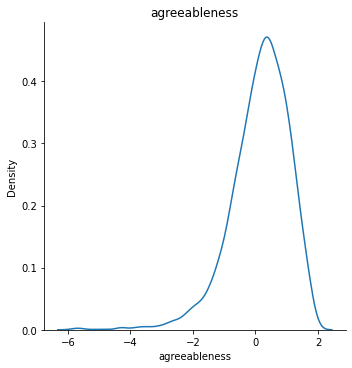

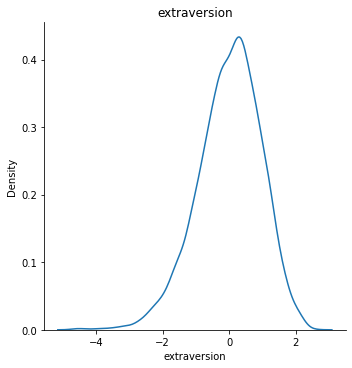

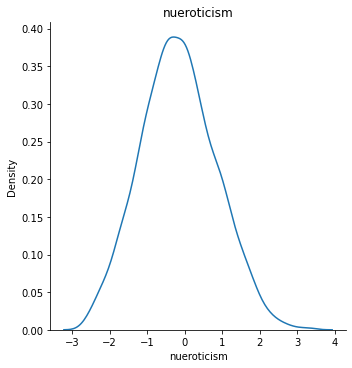

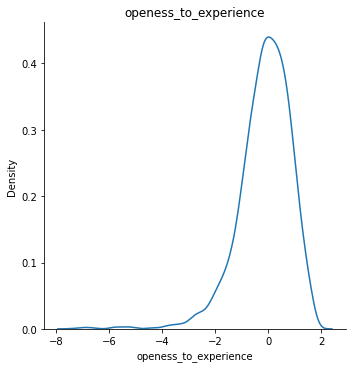

In [26]:
for i in cols:
    sns.displot(data = df[i],kind = 'kde')
    plt.title(i)
    plt.show()

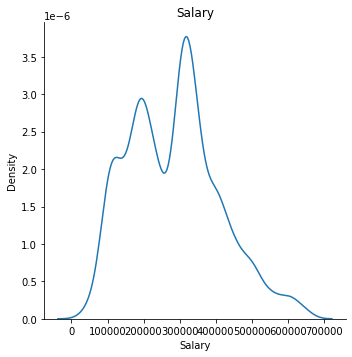

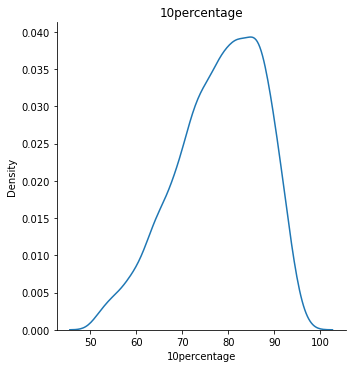

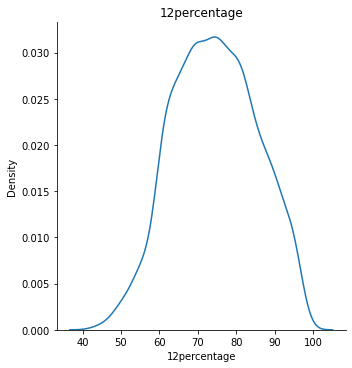

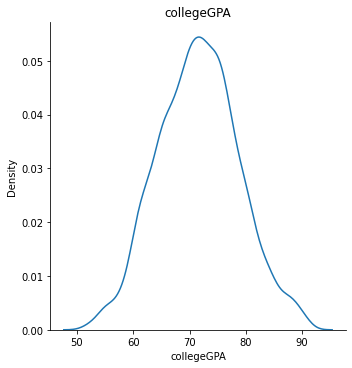

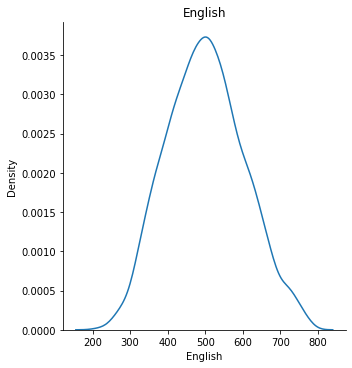

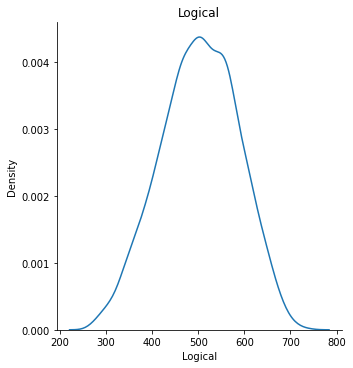

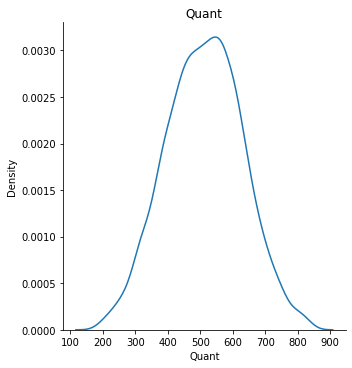

In [27]:
for i in l:
    sns.displot(data = cloned_data[i],kind = 'kde')
    plt.title(i)
    plt.show() 

# Observations

## Salary
We observe that the salaries are mostly between 30,000 and 700,000. There are a some points above this range which were treated as outliers. The most frequent salary is at around 320,000. From the boxplot, majority of the people are concentrated at salaries between 180,000 and 380,000.


## 10th Percentage

We observe that almost all of our data is between 50-95%. We also observe that students with the most frequent percentage are those who scored 85%.From the boxplot, majority of the people are concentrated at percentages between 70 and 85%.


## 12th Percentage

We observe that almost all of our data is between 45-95%. We also observe that students with the most frequent percentage are those who scored 75%.From the boxplot, majority of the people are concentrated at percentages between 65 and 85%.


## College GPA

Almost all of our data is concentrated between 50% and 90%. The most frequent percentage is around 75. From the boxplot, majority of the data is concentrated between 67% and 77%.

## English

All our data is concentrated between 200 and 800 with 550 being the most frequent score and the data being concentrated between 400 and 600.

## Logical

All our data is concentrated between 200 and 800 with 50 being the most frequent score and the data being concentrated between 450 and 550.

## Quant

All our data is concentrated between 200 and 890 with 550 being the most frequent score and the data being concentrated between 450 and 600.


The effect of outliers can be seen clearly by comparing both the plots

## Domain:

Scores are between 0 and 1. The dataset is concentrated between 0.25 and 0.9 with 0.85 being the most frequent score

## Conscientousness

Scores are between -4 and 2.5. The dataset is concentrated between -0.5 and 0.5 with 0.25 being the most frequent score

## Agreebleness

Scores are between -4 and 2.5. The dataset is concentrated between -0.25 and 0.85 with 0.75 being the most frequent score

## Extraversion

Scores are between -4 and 2.5. The dataset is concentrated between -0.75 and 0.85 with 0.50 being the most frequent score

## Neuroticism

Scores are between -3 and 4. The dataset is concentrated between -1.00 and 0.50 with 0.25 being the most frequent score

## Openness to Experience

Scores are between -7 and 2.5. The dataset is concentrated between -0.25 and 0.25 with 0 being the most frequent score

## Department scores:

Computer programming scores are between 300 and 500 with a most frequent score of 400. The corresponding most frequent scores are 350 for Electronics and semiconductors, 350 for Computer science, 375 for Mechanical, 400 for Electrical, 375 for Telecom and between 300 and 400 for civil


# Countplot for Categorical data

In [28]:
cat = df.describe(include = 'object')
cat_cols = cat.columns[1:]
print(cat_cols)

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')


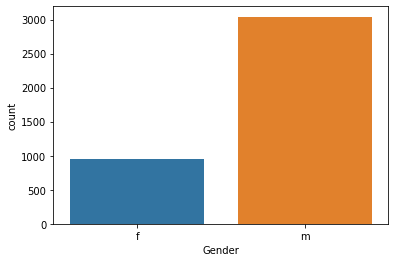

In [29]:
sns.countplot(x = 'Gender',data = df)
plt.show()

This shows the gender ratio

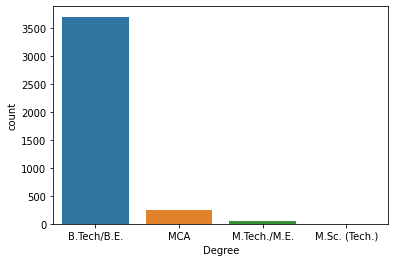

In [30]:
sns.countplot(x = 'Degree',data = df)
plt.show()

Majority have a Btech or B.E degree

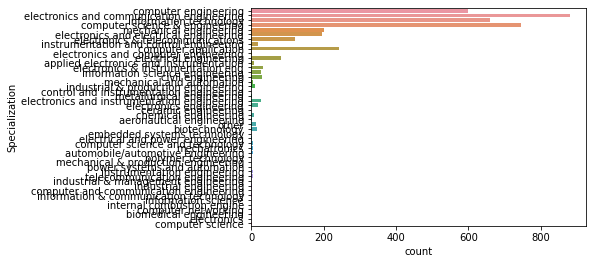

In [31]:
sns.countplot(y = 'Specialization',data = df)
plt.show()

This shows that a very high number of people opted for Electronics and Communication Engineering, Computer Science Engineering, Information technolog and Computer Engineering,in that order.

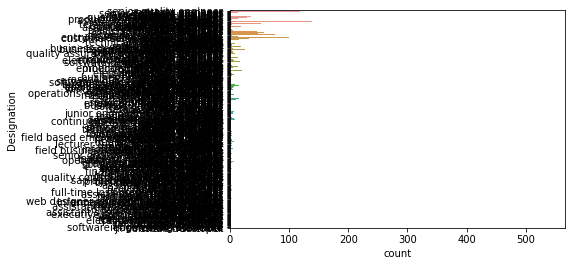

In [32]:
sns.countplot(y = 'Designation',data = df)
plt.show()

In [33]:
DES_SET =  df.groupby('Designation').count()
DES_SET.sort_values(by ='ID', ascending = 1)

,Unnamed: 0,ID,Salary,DOJ,DOL,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Designation,,,,,,,,,,,,,,,,,,,,,
windows systems administrator,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
hr executive,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
senior quality assurance engineer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
human resource assistant,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
human resources analyst,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
systems engineer,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
programmer analyst,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
system engineer,205,205,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205


# Bivariate Analysis

For plots between numerical columns, we plot salary vs different graduation percentages

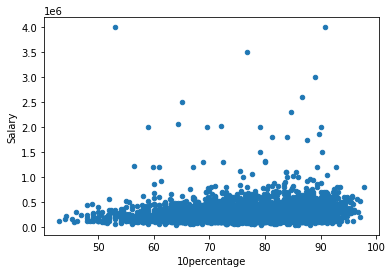

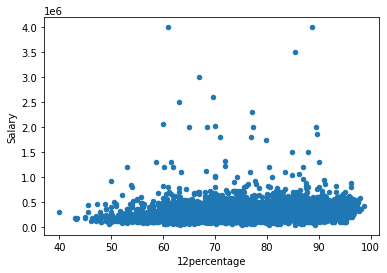

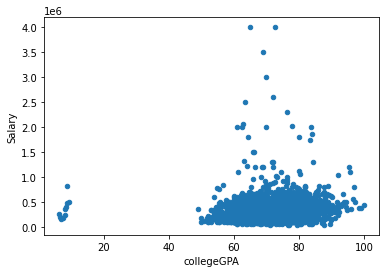

In [34]:
list1 = ['10percentage','12percentage','collegeGPA']
for i in list1:
    df.plot.scatter(x = i, y='Salary')
    plt.show()

The scatter plots do not show us a good picture,so we try other methods

In [35]:
l1 = ['Salary','10percentage','12percentage','collegeGPA','Gender']
cols1 = df[l1]
df1 = cols1.copy()
df1

,Salary,10percentage,12percentage,collegeGPA,Gender
0,420000,84.30,95.80,78.00,f
1,500000,85.40,85.00,70.06,m
2,325000,85.00,68.20,70.00,f
3,1100000,85.60,83.60,74.64,m
4,200000,78.00,76.80,73.90,m
...,...,...,...,...,...
3993,280000,52.09,55.50,61.50,m
3994,100000,90.00,93.00,77.30,f
3995,320000,81.86,65.50,70.00,m
3996,200000,78.72,69.88,70.42,f


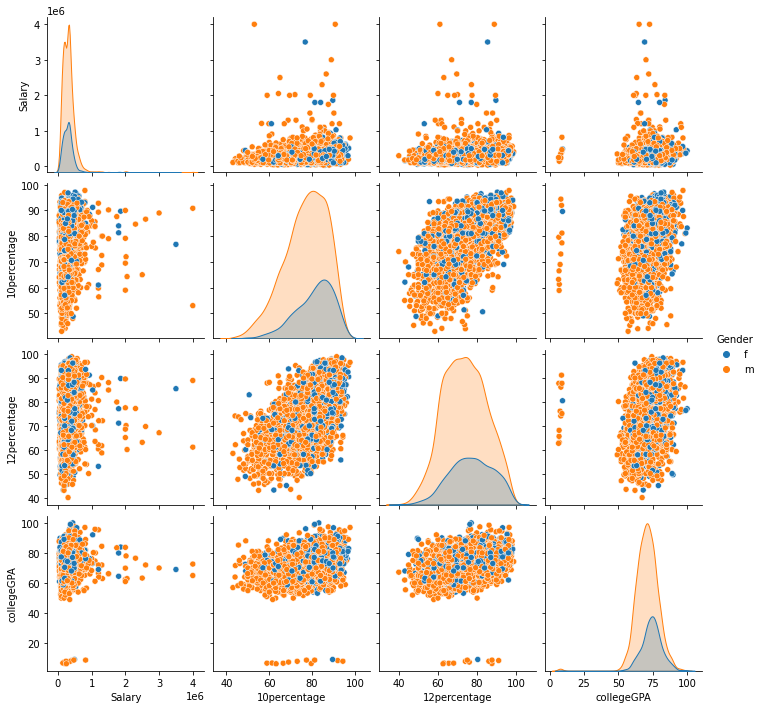

In [36]:
sns.pairplot(df1, hue = 'Gender')

# Observations

The above pairplots show the gender differences in salary, 10graduation %, 12graduation % and college GPA. 
The highest paid female earns around 300,000 but peak of the bulk of females is about 100,000. The highest paid male earns around 400,000. The points are pretty close by for other columns

C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


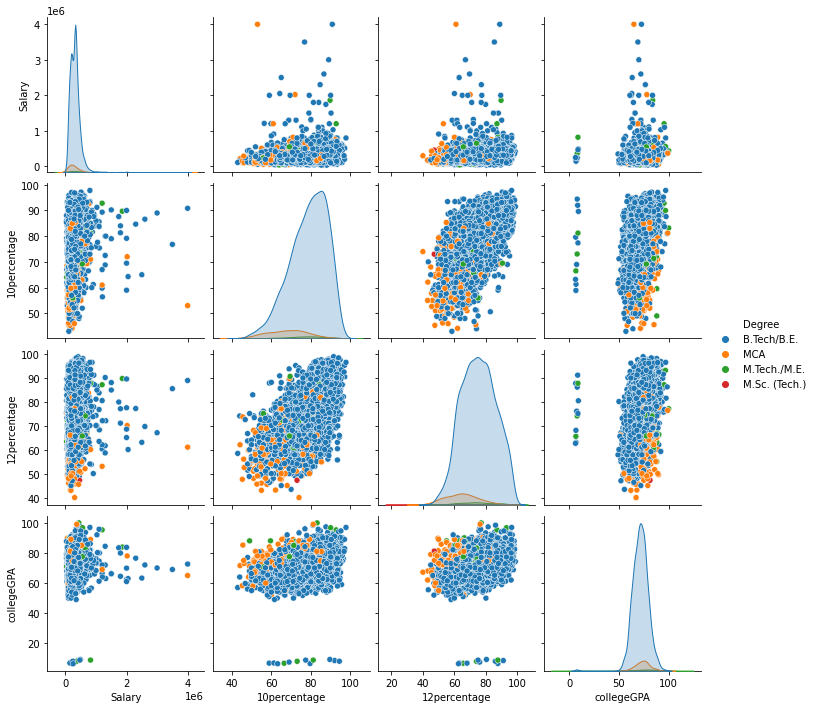

In [37]:
l2 = ['Salary','10percentage','12percentage','collegeGPA','Degree']
cols2 = df[l2]
df2 = cols2.copy()
sns.pairplot(df2, hue = 'Degree')

A significant number of people have a B.Tech or B.E degree.These ppl are evenly distributed for all the columns. People wiht MCA degree and have salaries below 100,000 with exception of 2 people. People  with M.tech, M.E or M.Sc degree also have salaries below 100,000 with the exception of a few. This is in contrast to the general perception, hence we can say that the data is biased.  

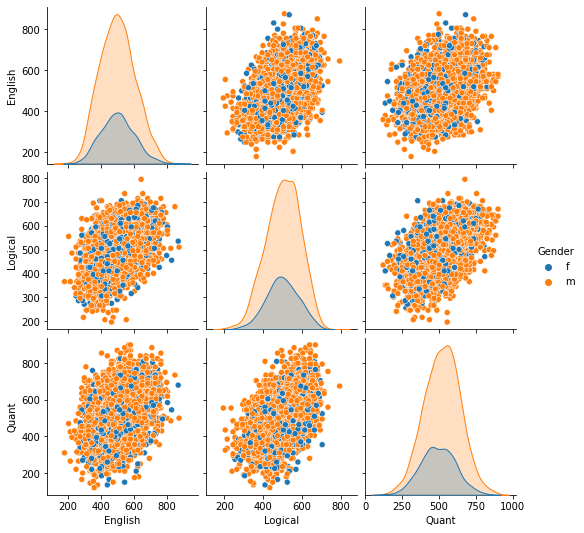

In [38]:
l3 = ['English', 'Logical','Quant','Gender']
cols3 = df[l3]
df3 = cols3.copy()
sns.pairplot(df3, hue = 'Gender')

The scores are evenly distributed among males and females

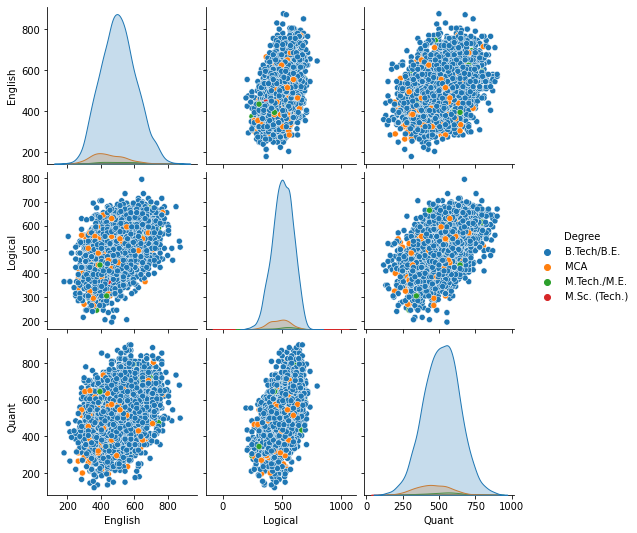

In [39]:
l4 = ['English', 'Logical','Quant','Degree']
cols4 = df[l4]
df4 = cols4.copy()
sns.pairplot(df4, hue = 'Degree')

As the data is too congested, lets take a look at barplots which gives us a measure of central tendency, mean by default, of each degree.

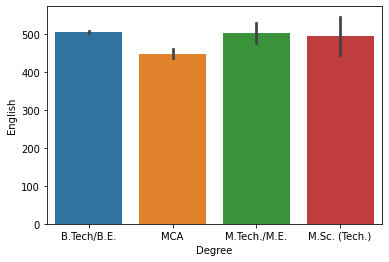

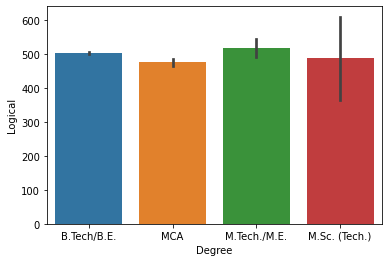

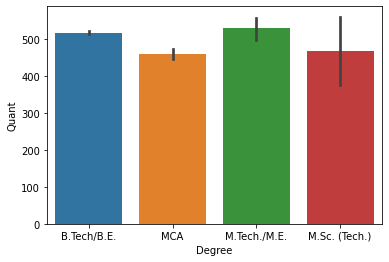

In [40]:
for i in ['English', 'Logical','Quant']:
    sns.barplot(x = 'Degree', y = i, data = df)
    plt.show()

We can see that on average person with any degree scored between (450-500) in English, Logic and Quant. Let us compare the median as well.

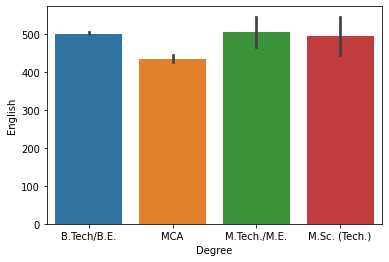

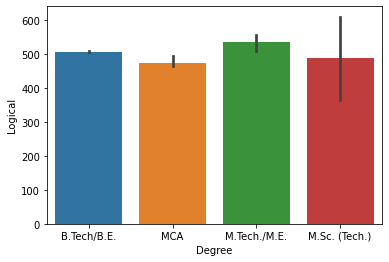

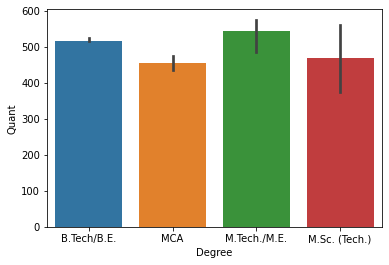

In [41]:
for i in ['English', 'Logical','Quant']:
    sns.barplot(x = 'Degree', y = i, data = df, estimator = np.median)
    plt.show()

Hence, the English, Logic and quant scores are similar on average for all the degrees

Since, we know what a barplot does, let us try to have a better understanding of salary vs degree for both the genders.

Text(0.5, 1.0, 'Mean')

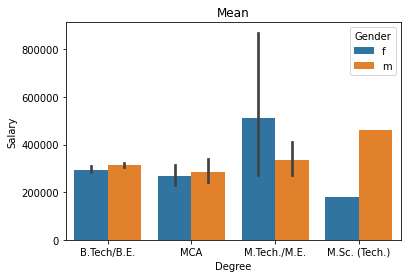

In [42]:
sns.barplot(x = 'Degree' ,y = 'Salary' , hue = 'Gender' , data = df)
plt.title('Mean')

Text(0.5, 1.0, 'Median')

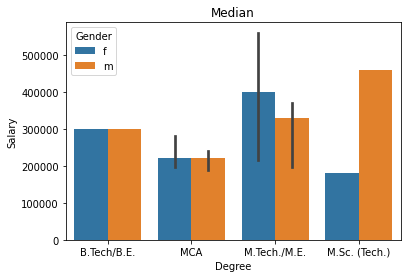

In [43]:
sns.barplot(x = 'Degree' ,y = 'Salary' , hue = 'Gender' , data = df ,estimator = np.median)
plt.title('Median')

Text(0.5, 1.0, 'Standard deviation')

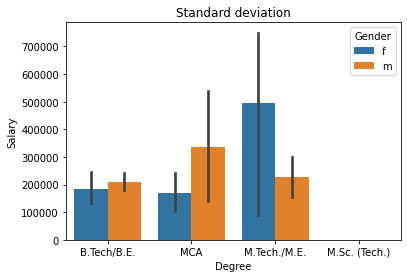

In [44]:
sns.barplot(x = 'Degree' ,y = 'Salary' , hue = 'Gender' , data = df ,estimator = np.std)
plt.title('Standard deviation')

Text(0.5, 1.0, 'Maximum salary')

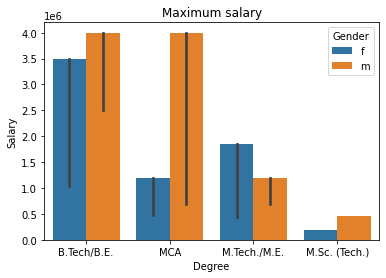

In [45]:
sns.barplot(x = 'Degree' ,y = 'Salary' , hue = 'Gender' , data = df ,estimator = np.max)
plt.title('Maximum salary')

Text(0.5, 1.0, 'Minimum salary')

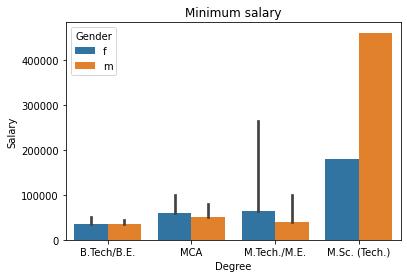

In [46]:
sns.barplot(x = 'Degree' ,y = 'Salary' , hue = 'Gender' , data = df ,estimator = np.min)
plt.title('Minimum salary')

Mean and median salary for both genders holding B.Tech/B.E or M.C.A degree but the salaries are more spread out among females as seen from the standard deviation plot. The max value plot also consolidates our claim as the highest earning female is paid more than the highest earning male and lowest earning female is paid less than the lowest earning male. Clear difference in salaries can be seen for M.Tech/M.E degree holders with men having higher pay. The opposite can be said about M.Sc degree holders

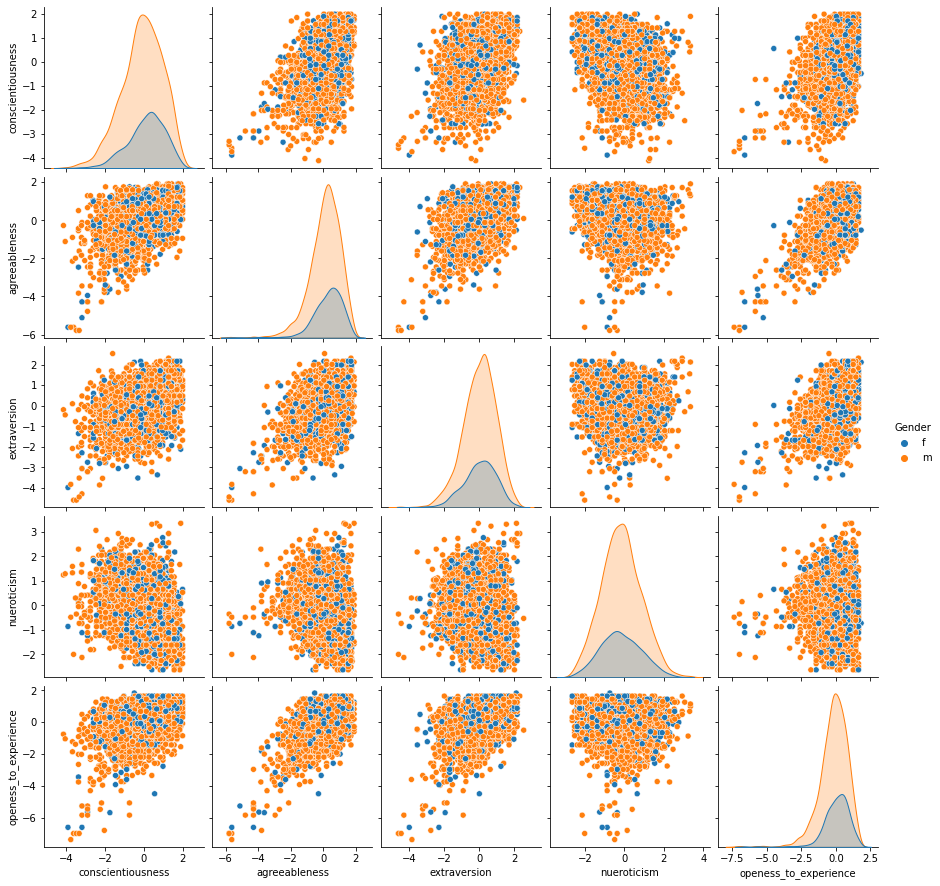

In [47]:
l5 = ['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience','Gender']
cols5 = df[l5]
df5 = cols5.copy()
sns.pairplot(df5, hue = 'Gender')

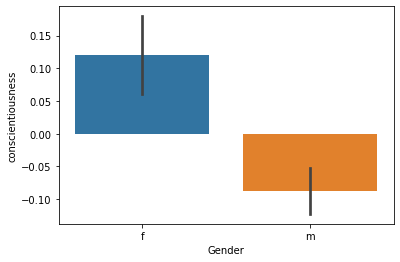

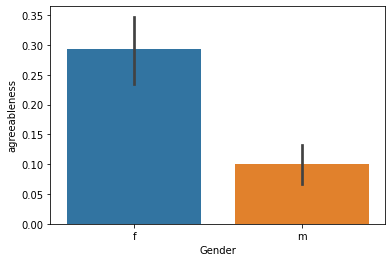

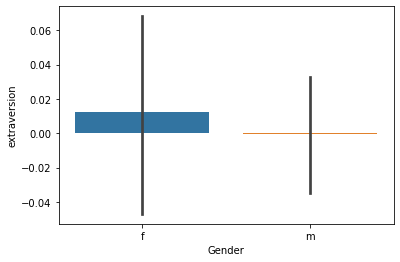

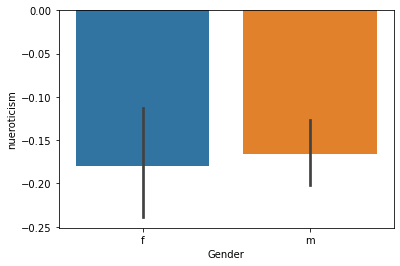

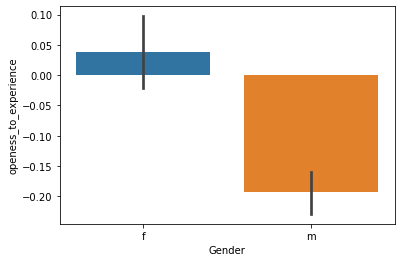

In [48]:
for i in ['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience']:
    sns.barplot(x = 'Gender', y = i, data = df)
    plt.show()

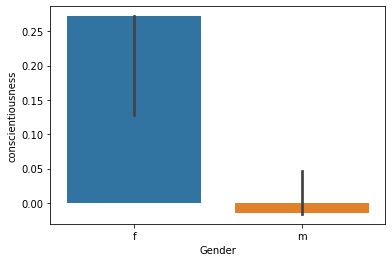

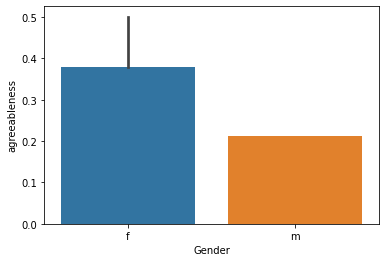

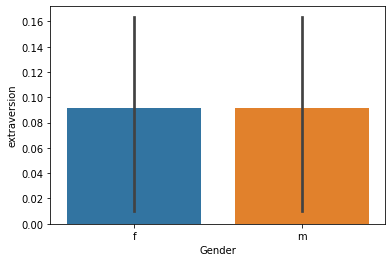

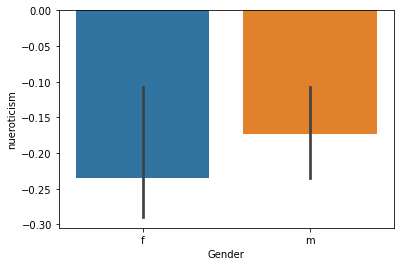

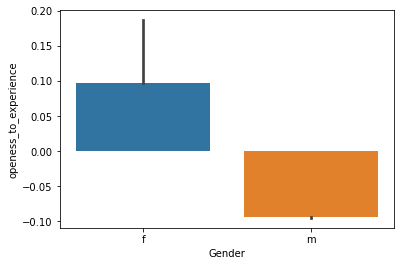

In [49]:
for i in ['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience']:
    sns.barplot(x = 'Gender', y = i, data = df , estimator = np.median)
    plt.show()

We can conclude some personality traits from the above barplots. Females are likely to be more consientious, open to experience, extravert and agreeable. Males have a higher average neurotic score.

In [50]:
x = []
for i in range(len(df['ComputerProgramming'])):
    if df['ComputerProgramming'][i] != -1:
        x.append(i)
print(len(x))

3130


In [51]:
y = []
z = []
for i in x:
    y.append(df['ComputerProgramming'][i])
    z.append(df['Specialization'][i])

In [52]:
temp = pd.DataFrame()
temp['ComputerProgramming'] = y
temp['Specialization'] = z

In [53]:
temp['Specialization'].value_counts()

computer science & engineering                 711
information technology                         642
computer engineering                           587
electronics and communication engineering      518
computer application                           232
electronics and electrical engineering         116
electronics & telecommunications                69
mechanical engineering                          56
electrical engineering                          44
information science engineering                 26
electronics & instrumentation eng               16
instrumentation and control engineering         15
electronics and instrumentation engineering     15
civil engineering                               10
electronics engineering                          9
other                                            8
biotechnology                                    6
computer science and technology                  6
applied electronics and instrumentation          5
telecommunication engineering  

C:\Users\91810\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91810\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91810\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91810\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91810\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.8% of the points

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Specialization'>

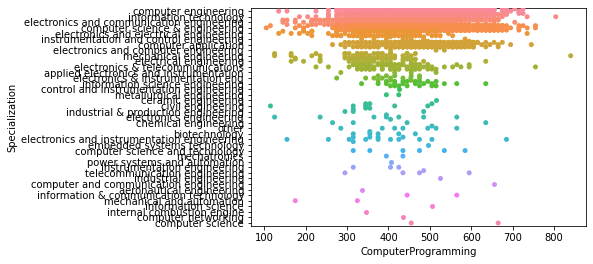

In [54]:
sns.swarmplot(y = 'Specialization', x = 'ComputerProgramming', data = temp)

We can see that people across different specializations attempted Computer Science test. The value count and the swarmplot justify that

# Research Question

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

Specialisation : Computer Science Engineering

In [55]:
yoj = []
for i in df['DOJ']:
    yoj.append(str(i)[:4])
DATA  = df.copy()
DATA['YOJ'] = yoj

In [56]:
spec = df['Specialization']
spec_index = []
for i in range(len(spec)):
    if spec[i] == 'computer science & engineering':
        spec_index.append(i)
spec_index = set(spec_index)

In [57]:
des = df['Designation']
des_index = []
for i in range(len(des)):
    if (des[i] == 'programmer analyst') or (des[i] == 'programmer analyst trainee') or (des[i] == 'software engineer') or (des[i] == 'senior software engineer') or (des[i] == 'java software engineer') or (des[i] == 'associate software engineer') or (des[i] == 'software engineer') or (des[i] == 'software engineer trainee') or (des[i] == 'associate software engineer') or (des[i] == 'hardware engineer') or (des[i] == 'associate engineer'):
        des_index.append(i)
des_index = set(des_index)

In [58]:
grad = df['GraduationYear']
grad_index = []
for i in range(len(grad)):
    if grad[i] == int(DATA['YOJ'][i]):
        grad_index.append(i)
grad_index = set(grad_index)


In [59]:
indices = spec_index.intersection(grad_index,des_index)

In [60]:
vals = []
for i in indices:
    vals.append(df['Salary'][i])
print(len(indices)) 
print(len(vals))

131
131


We perform Hypothesis testing with these 1459 values.\
Our Bold claim : $ H_1 : \mu $ > 2.5 and \
Status quo : $ H_0  : \mu \leq $ 2.5

In [61]:
mean = sum(vals)/len(vals)
mu = 250000
def std(l):
    m = sum(l)/len(l)
    s = 0
    for i in l:
        s = s + (i-m)**2
    s = s/(len(l)-1)
    return (s**0.5)
def t_score(X,u,S,n):
    return (X-u)/(S/(n**0.5))
std_dev = std(vals)
t_sc = t_score(mean,mu,std_dev,len(vals))

Let us choose a significane level of 0.05

In [62]:
t_critical = t.ppf(0.05,df = len(indices) - 1)

In [63]:
if abs(t_sc) > abs(t_critical):
    print('We reject Null Hypothesis')
else:
    print("Fail to reject Null Hypothesis")

We reject Null Hypothesis


Hence the salary is likely to be more than 2.5 lakhs

# Research Question

Is there a relationship between gender and specialisation?

For this, we need to perform the chi square test \
$ H_1 $ : Gender and specialization are independent \
$ H_0 $ : Gender and specialization are not independent

In [64]:
c_tab = pd.crosstab(df['Gender'],df['Specialization'])
c_tab["row_sum"] = c_tab.sum(axis=1)
c_tab.loc['col_sum'] = c_tab.sum(axis=0)
c_tab
# This are the observed values

Specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,...,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering,row_sum
Gender,,,,,,,,,,,,,,,,,,,,,
f,1,2,0,2,9,0,1,6,0,59,...,0,0,10,1,0,0,0,0,1,957
m,2,7,5,0,6,1,8,23,1,185,...,1,5,191,3,2,13,1,1,5,3041
col_sum,3,9,5,2,15,1,9,29,1,244,...,1,5,201,4,2,13,1,1,6,3998


In [65]:
obs_f = c_tab.iloc[0,:-1].values
obs_m = c_tab.iloc[1,:-1].values
col_sum = c_tab.iloc[2,:-1].values
exp_f = []
exp_m = []
for i in range(len(obs_f)):
    exp_f.append(col_sum[i]*(957/3998))
    exp_m.append(col_sum[i]*(3041/3998))
dof = len(obs_f) - 1
arr_f = obs_f - exp_f
arr_m = obs_m - exp_m

chi_sq = 0

for i in range(dof+1):
    q_f = (arr_f[i]**2)/exp_f[i]
    q_m = (arr_m[i]**2)/exp_m[i]
    chi_sq = chi_sq + q_f + q_m
print('Chi score :',chi_sq)

Chi score : 104.46891913608457


In [66]:
# Calculating chi critical
from scipy.stats import chi2

In [67]:
#confidence = 0.95
chi_critical = chi2.ppf(0.95,df = dof)
print(chi_critical)

61.65623337627955


In [68]:
if chi_critical < chi_sq:
    print('Gender and Designation are not independent,Reject H1')
else:
    print('Gender and Designation are independent, Accept H1')

Gender and Designation are not independent,Reject H1


In [69]:
#reaffirming with p value test
alpha =1 - 0.95
p_val = 1 - chi2.cdf(chi_sq ,df = dof)
print(p_val)

1.2453868176720562e-06


In [70]:
if p_val < alpha:
    print('Gender and Designation are not independent,Reject H1')
else:
    print('Gender and Designation are independent, Accept H1')

Gender and Designation are not independent,Reject H1


# Conclusion

This dataset can be used to predict the salary given the students score in various stages and in AMCAT exam. It can also predict different personality aspects or salary based on personality aspects.

## Research Question 

One interesting research question can be personality aspects vs gender. Since our data is biased as in it covers only engineering students

# Encoding variable

We one hot encode Gender and Degree from earlier copied dataframes

In [98]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df1[['Gender']]).toarray())
# merge with main df bridge_df on key values
DF1 = df1.join(enc_df)
DF1

,Salary,10percentage,12percentage,collegeGPA,Gender,0,1
0,420000,84.30,95.80,78.00,f,1.0,0.0
1,500000,85.40,85.00,70.06,m,0.0,1.0
2,325000,85.00,68.20,70.00,f,1.0,0.0
3,1100000,85.60,83.60,74.64,m,0.0,1.0
4,200000,78.00,76.80,73.90,m,0.0,1.0
...,...,...,...,...,...,...,...
3993,280000,52.09,55.50,61.50,m,0.0,1.0
3994,100000,90.00,93.00,77.30,f,1.0,0.0
3995,320000,81.86,65.50,70.00,m,0.0,1.0
3996,200000,78.72,69.88,70.42,f,1.0,0.0


In [101]:
enc_df = pd.DataFrame(enc.fit_transform(df2[['Degree']]).toarray())
# merge with main df bridge_df on key values
DF2 = df2.join(enc_df)
DF2

,Salary,10percentage,12percentage,collegeGPA,Degree,0,1,2,3
0,420000,84.30,95.80,78.00,B.Tech/B.E.,1.0,0.0,0.0,0.0
1,500000,85.40,85.00,70.06,B.Tech/B.E.,1.0,0.0,0.0,0.0
2,325000,85.00,68.20,70.00,B.Tech/B.E.,1.0,0.0,0.0,0.0
3,1100000,85.60,83.60,74.64,B.Tech/B.E.,1.0,0.0,0.0,0.0
4,200000,78.00,76.80,73.90,B.Tech/B.E.,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3993,280000,52.09,55.50,61.50,B.Tech/B.E.,1.0,0.0,0.0,0.0
3994,100000,90.00,93.00,77.30,B.Tech/B.E.,1.0,0.0,0.0,0.0
3995,320000,81.86,65.50,70.00,B.Tech/B.E.,1.0,0.0,0.0,0.0
3996,200000,78.72,69.88,70.42,B.Tech/B.E.,1.0,0.0,0.0,0.0


In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sal = df1.iloc[:,:-1].values
X_sal = sc.fit_transform(X_sal)

In [105]:
print(X_sal)

[[ 0.52794734  0.64723345  1.93967569  0.797646  ]
 [ 0.90404468  0.75892071  0.95772873 -0.17464063]
 [ 0.08133175  0.71830716 -0.56974433 -0.18198788]
 ...
 [ 0.05782567  0.39949082 -0.81523107 -0.18198788]
 [-0.50632033  0.08067447 -0.41699702 -0.1305571 ]
 [ 0.43392301 -0.74378053 -0.58792853 -0.42689635]]


We have successfully scaled and encoded the data for some dummy dataframes